<a href="https://colab.research.google.com/github/ydicsey/image-processing/blob/main/unsharp_masking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import the library
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import math

from skimage import io
from skimage.filters import unsharp_mask

In [ ]:
!git clone https://github.com/mikolalysenko/lena.git

fatal: destination path 'lena' already exists and is not an empty directory.


In [ ]:
img_path = '/content/lena/lena.png'
img = cv.imread(img_path, 0).astype(np.float32)
img.shape

(512, 512)

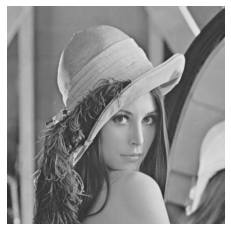

In [ ]:
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.axis('off')
# image is float 
# in plt says: correct dada -> array-like or PIL image
# (M, N, 3): an image with RGB values (0-1 float or 0-255 int).
# to displays correctly
plt.imshow(img/255)
plt.show()

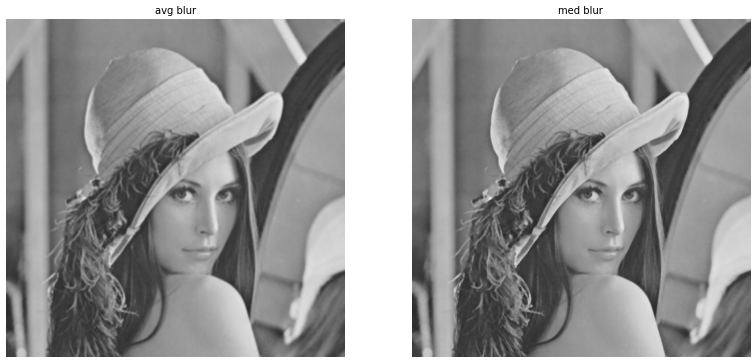

In [ ]:
# avg blur
avg_blurred = cv.blur(img, ksize = (3, 3))
# med blur
med_blurred = cv.medianBlur(img, 3)

f = plt.figure(num=None, figsize=(16, 12), dpi=60)

ax1 = f.add_subplot(1,2, 1)
plt.axis('off')
plt.imshow(avg_blurred/255)
ax1.title.set_text('avg blur')

ax2 = f.add_subplot(1,2, 2)
plt.axis('off')
plt.imshow(med_blurred/255)
ax2.title.set_text('med blur')

plt.show()

In [ ]:
avg_result = img + (img - avg_blurred)*1
avg_result = np.clip(avg_result, 0, 255).astype('uint8')

In [ ]:
med_result = img + (img - med_blurred)*1
med_result = np.clip(med_result, 0, 255).astype('uint8')

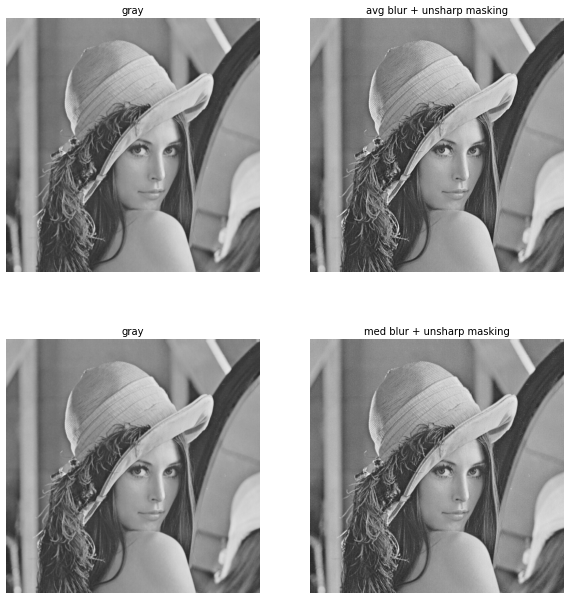

In [ ]:
f = plt.figure(num=None, figsize=(12, 13), dpi=60)

ax1 = f.add_subplot(2, 2, 1)
plt.axis('off')
plt.imshow(img/255, cmap="gray")
ax1.title.set_text('gray')

ax2 = f.add_subplot(2,2, 2)
plt.axis('off')
plt.imshow(avg_result, cmap="gray")
ax2.title.set_text('avg blur + unsharp masking')

ax1 = f.add_subplot(2, 2, 3)
plt.axis('off')
plt.imshow(img/255, cmap="gray")
ax1.title.set_text('gray')

ax3 = f.add_subplot(2,2, 4)
plt.axis('off')
plt.imshow(med_result, cmap="gray")
ax3.title.set_text('med blur + unsharp masking')

plt.show()

In [ ]:
path = "avg.jpg"
cv.imwrite(path, avg_result)

True

In [ ]:
path = "med.jpg"
cv.imwrite(path, med_result)

True